# Sales Data Analysis Project

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [48]:
df = pd.read_csv("company_sales_data.csv")
df.head()

,Order_ID,Customer_Age,Gender,City,Product_Category,Quantity,Price,Discount,Payment_Mode,Order_Rating
0,1001,56.0,Female,Kolkata,Electronics,4.0,453.21,10.0,Card,3.0
1,1002,NaN,Male,Kolkata,NaN,NaN,449.16,15.0,UPI,4.0
2,1003,46.0,Female,Kolkata,Groceries,3.0,159.33,15.0,NetBanking,3.0
3,1004,32.0,Male,Kolkata,Groceries,4.0,4786.86,0.0,Card,4.0
4,1005,60.0,Male,Chennai,Clothing,5.0,3713.79,5.0,Cash,2.0


In [49]:
df.shape

(500, 10)

In [50]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_ID          500 non-null    int64  
 1   Customer_Age      411 non-null    float64
 2   Gender            448 non-null    object 
 3   City              421 non-null    object 
 4   Product_Category  396 non-null    object 
 5   Quantity          333 non-null    float64
 6   Price             500 non-null    float64
 7   Discount          389 non-null    float64
 8   Payment_Mode      407 non-null    object 
 9   Order_Rating      415 non-null    float64
dtypes: float64(5), int64(1), object(4)
memory usage: 39.2+ KB


,Order_ID,Customer_Age,Quantity,Price,Discount,Order_Rating
count,500.000000,411.000000,333.000000,500.000000,389.000000,415.000000
mean,1250.500000,41.316302,4.897898,2570.204000,7.532134,2.983133
std,144.481833,13.387552,2.511737,1408.799445,5.637423,1.433621
min,1001.000000,18.000000,1.000000,115.770000,0.000000,1.000000
25%,1125.750000,30.500000,3.000000,1343.885000,0.000000,2.000000
50%,1250.500000,42.000000,5.000000,2637.040000,10.000000,3.000000
75%,1375.250000,52.000000,7.000000,3801.802500,10.000000,4.000000
max,1500.000000,64.000000,9.000000,4991.900000,15.000000,5.000000


## Data Understanding

In [51]:
df.isnull().sum()

Order_ID              0
Customer_Age         89
Gender               52
City                 79
Product_Category    104
Quantity            167
Price                 0
Discount            111
Payment_Mode         93
Order_Rating         85
dtype: int64

### Numerical column

In [52]:
df["Customer_Age"].fillna(df["Customer_Age"].median(),inplace=True)
df["Quantity"].fillna(df["Quantity"].median(),inplace=True)
df["Discount"].fillna(df["Discount"].median(),inplace=True)
df["Order_Rating"].fillna(df["Order_Rating"].median(),inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2972\2172078757.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Customer_Age"].fillna(df["Customer_Age"].median(),inplace=True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2972\2172078757.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

### Categorical Column

In [54]:
df["Gender"].fillna(df["Gender"].mode()[0],inplace=True)
df["City"].fillna(df["City"].mode()[0],inplace=True)
df["Product_Category"].fillna(df["Product_Category"].mode()[0],inplace=True)
df["Payment_Mode"].fillna(df["Payment_Mode"].mode()[0],inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2972\3289758861.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Gender"].fillna(df["Gender"].mode()[0],inplace=True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2972\3289758861.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


### Recheck

In [55]:
df.isnull().sum()

Order_ID            0
Customer_Age        0
Gender              0
City                0
Product_Category    0
Quantity            0
Price               0
Discount            0
Payment_Mode        0
Order_Rating        0
dtype: int64

In [56]:
df["Total_Amount"] = df["Quantity"] * df["Price"]
df.head()

,Order_ID,Customer_Age,Gender,City,Product_Category,Quantity,Price,Discount,Payment_Mode,Order_Rating,Total_Amount
0,1001,56.0,Female,Kolkata,Electronics,4.0,453.21,10.0,Card,3.0,1812.84
1,1002,42.0,Male,Kolkata,Books,5.0,449.16,15.0,UPI,4.0,2245.80
2,1003,46.0,Female,Kolkata,Groceries,3.0,159.33,15.0,NetBanking,3.0,477.99
3,1004,32.0,Male,Kolkata,Groceries,4.0,4786.86,0.0,Card,4.0,19147.44
4,1005,60.0,Male,Chennai,Clothing,5.0,3713.79,5.0,Cash,2.0,18568.95


In [ ]:
Total = df["Total_Amount"].sum()
print(Total)

6420579.03


### City Wise Revenue

In [58]:
df.groupby("City")["Total_Amount"].sum().sort_values(ascending=False)

City
Delhi        2195214.99
Chennai      1132470.16
Mumbai       1096161.21
Bangalore    1017146.16
Kolkata       979586.51
Name: Total_Amount, dtype: float64

### Product Category Wise Sale

In [59]:
df.groupby("Product_Category")["Total_Amount"].sum().sort_values(ascending=False)

Product_Category
Books          2776595.25
Clothing       1448632.72
Electronics    1228543.37
Groceries       966807.69
Name: Total_Amount, dtype: float64

### Rating Analysis (Product Quality)

In [60]:
df.groupby("Product_Category")["Order_Rating"].mean()

Product_Category
Books          2.923445
Clothing       2.864078
Electronics    2.927835
Groceries      3.329670
Name: Order_Rating, dtype: float64

## Visualization

### Revenue By City

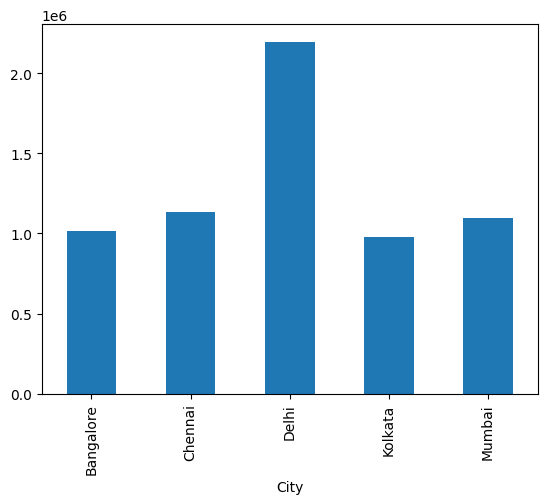

In [61]:
df.groupby("City")["Total_Amount"].sum().plot(kind="bar")
plt.show()

### Rating Distribution

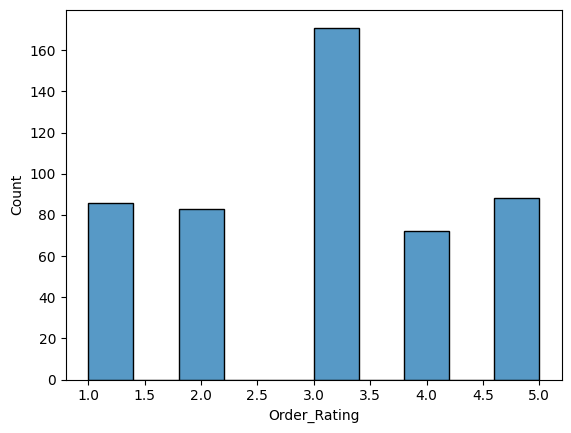

In [62]:
sns.histplot(df["Order_Rating"])
plt.show()